In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [94]:
def norm(a):
    return np.linalg.norm(a);

def normal(t):
    tx, ty = t
    n = np.array([-ty, tx]);
    return n

def tangent(a, b, c):
    d1 = norm(b-a);
    d2 = norm(c-b)
    t = -a*d2/d1/(d1+d2) -b*(d1-d2)/d1/d2 + c*d1/d2/(d1+d2);
    l = norm(t);
    return (t/l)


def polynomial_p4(x0, x1, x2, x3, s1, s2, s3, u):                   
    xu = -(u-s1)*(u-s2)*(u-s3)*x0/s1/s2/s3 + (u)*(u-s2)*(u-s3)*x1/s1/(s1-s2)/(s1-s3) 
    xu += (u)*(u-s1)*(u-s3)*x2/s2/(s2-s1)/(s2-s3)  + (u)*(u-s1)*(u-s2)*x3/s3/(s3-s1)/(s3-s2)
    return xu;

def tangent_p4(x0, x1, x2, x3, s1, s2, s3, u):                   
    t = -( (u-s2)*(u-s3) + (u-s1)*(u-s3) + (u-s1)*(u-s2) )*x0/s1/s2/s3
    t += ( (u-s2)*(u-s3) + (u)*(u-s3) + (u)*(u-s2) )*x1/s1/(s1-s2)/(s1-s3) 
    t += ( (u-s1)*(u-s3) + (u)*(u-s3) + (u)*(u-s1) )*x2/s2/(s2-s1)/(s2-s3)
    t += ( (u-s1)*(u-s2) + (u)*(u-s2) + (u)*(u-s1) )*x3/s3/(s3-s1)/(s3-s2)
    l = norm(t);
    return (t/l)

def tangent5(a, b, c, d, e):
    s1 = norm(b-a);
    s2 = norm(c-b) + s1;
    s3 = norm(d-c) + s2;
    s4 = norm(e-d) + s3;
    u = s2;
    #define tangent_p5(x0, x1, x2, x3, x4, s1, s2, s3, s4, u)\
    c0 = ((u-s2)*(u-s3)*(u-s4) + (u-s1)*(u-s3)*(u-s4) + (u-s1)*(u-s2)*(u-s4) + (u-s1)*(u-s2)*(u-s3))/s1/s2/s3/s4;
    c1 = ((u-s2)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s3))/s1/(s1-s2)/(s1-s3)/(s1-s4);
    c2 = ((u-s1)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s3))/s2/(s2-s1)/(s2-s3)/(s2-s4);
    c3 = ((u-s1)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s2))/s3/(s3-s1)/(s3-s2)/(s3-s4);
    c4 = ((u-s1)*(u-s2)*(u-s3) + (u)*(u-s2)*(u-s3) + (u)*(u-s1)*(u-s3) + (u)*(u-s1)*(u-s2))/s4/(s4-s1)/(s4-s2)/(s4-s3);
    t = a*c0 + b*c1 + c*c2 + d*c3 + e*c4;
    l = norm(t);
    return (t/l)

def kappa(t1, t2, a, b):
    n = normal(b-a);  
    kn = t2 - t1;
    kappa = norm(kn)*np.sign(np.dot(kn,n))/norm(n);
    return kappa;
    
def tangent2(ta, tb, a, b):
    n = tb - ta;
    n = n*np.sign(kappa(ta, tb, a, b))/norm(n);
    t = -normal(n);
    return t;

def centroid(a,b):
    c = (a+b)*0.5
    return c;
   
def Hermite(a,b,ta,tb,s):
    l = norm(a-b);
    return ((2*(a-b) + l*(ta+tb))*s*s*s + (-3*(a-b) - l*(2*ta+tb))*s*s +  l*ta*s + a)

def dHermite(a,b,ta,tb,s):
    l = norm(a-b);
    t = 3*(2*(a-b)/l + (ta+tb))*s*s + 2*(-3*(a-b)/l - (2*ta+tb))*s +  ta
    return (t/norm(t))

# def kappa5(a,b,c,d,e):
#     tb = tangent(a,b,c);
#     tc = tangent(b,c,d);
#     td = tangent(c,d,e);
#     xl = Hermite(b,c,tb,tc,0.5);
#     xr = Hermite(c,d,tc,td,0.5);
#     tl = dHermite(b,c,tb,tc,0.5);
#     tr = dHermite(c,d,tc,td,0.5);
#     return (kappa(tl, tr, xl, xr))

def kappa5(a,b,c,d,e):
    s1 = norm(b-a); s2 = s1 + norm(c-b); s3 = s2 + norm(d-c); s = s1 + 0.5*norm(c-b);
    xl = polynomial_p4(a,b,c,d,s1,s2,s3,s);
    tl = tangent_p4(a,b,c,d,s1,s2,s3,s);
    s1 = norm(c-b); s2 = s1 + norm(d-c); s3 = s2 + norm(e-d); s = s1 + 0.5*norm(d-c);
    xr = polynomial_p4(b,c,d,e,s1,s2,s3,s);
    tr = tangent_p4(b,c,d,e,s1,s2,s3,s);
    return (kappa(tl, tr, xl, xr))

def kappa4(a,b,c,d):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    return (kappa(tb, tc, b, c))

In [3]:
def boundary(x,y):
    xb = []
    yb = []
    for i_ in range(5):
        i = 5-i_;
        xb.append(-x[i])
        yb.append(y[i])
    l, = np.shape(x)
    for i in range(l):
        xb.append(x[i])
        yb.append(y[i])
    for i_ in range(5):
        i = (l-2)-i_
        xb.append(x[i])
        yb.append(-y[i])
    return xb,yb
def boundary_symm(s):
    sb = []
    for i_ in range(5):
        i = 5-i_;
        sb.append(s[i])
    l, = np.shape(s)
    for i in range(l):
        sb.append(s[i])
    for i_ in range(5):
        i = (l-2)-i_
        sb.append(s[i])
    return sb
def boundary_kappa(s):
    sb = []
    for i_ in range(5):
        i = 4-i_;
        sb.append(s[i])
    l, = np.shape(s)
    for i in range(l):
        sb.append(s[i])
    for i_ in range(5):
        i = (l-1)-i_
        sb.append(s[i])
    return sb

def kappa_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa5(a,b,c,d,e))
    return k;

def kappa_centroid_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 11;
    thetac = [];k = [];
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        xc = centroid(c,d)
        th = np.arctan2(xc[1], xc[0])
        thetac.append(th)
        k.append(kappa4(b,c,d,e))
    return thetac,k;

def kappa_interpolation(a,b,c,d,e, kp, kq, kr, ks):
    d1 = norm(b-a); d2 = norm(c-b); d3 = norm(d-c); d4 = norm(e-d);
    s1 = 0.5*(d1+d2); s2 = s1 + 0.5*(d2+d3); s3 = s2 + 0.5*(d3+d4); s = 0.5*d1+d2;
    kc = polynomial_p4(kp, kq, kr, ks, s1, s2, s3, s)
    return kc;

def kappa_interpolation_vector(xb,yb):
    thetac, kc = kappa_centroid_vector(xb,yb);
    kc = boundary_kappa(kc);
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa_interpolation(a,b,c,d,e,kc[i-2],kc[i-1],kc[i],kc[i+1]))
    return k;

def dk_ds_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    dkds = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tb = tangent(a,b,c);
        tc = tangent(b,c,d);
        td = tangent(c,d,e);
        xl = Hermite(b,c,tb,tc,0.5);
        xr = Hermite(c,d,tc,td,0.5);
        kl = kappa4(a,b,c,d)
        kr = kappa4(b,c,d,e)
        val = (kr-kl)/(norm(xr-c)+norm(c-xl));
        dkds.append(val)
    return dkds;

def ddk_dsds7(z,a,b,c,d,e,f):
    tb = tangent5(z,a,b,c,d);
    tc = tangent5(a,b,c,d,e);
    td = tangent5(b,c,d,e,f);
    kl = kappa5(z,a,b,c,d)
    km = kappa5(a,b,c,d,e)
    kr = kappa5(b,c,d,e,f)
    dr = norm(b-c);
    dl = norm(c-d);
    val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
    return val;

def ddk_dsds5(a,b,c,d,e):
    kl = kappa4(a,b,c,d)
    kr = kappa4(b,c,d,e)
    km = kappa5(a,b,c,d,e)
    dr = 0.5*norm(b-c);
    dl = 0.5*norm(c-d);
    val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
    return val;

def ddk_dsds(a,b,c,d,e):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    td = tangent(c,d,e);
    xl = Hermite(b,c,tb,tc,0.5);
    xr = Hermite(c,d,tc,td,0.5);
    kl = kappa4(a,b,c,d)
    km = kappa5(a,b,c,d,e)
    kr = kappa4(b,c,d,e)
    dr = norm(xr-c);
    dl = norm(c-xl);
    val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
    return val;


def ddk_dsds_vector(xb,yb):
    l, = np.shape(xb);
    k = kappa_interpolation_vector(xb,yb);
    k = boundary_symm(k);
    l = l - 10;
    ddk_dsds = []
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        dr = norm(d-c); dl = norm(c-b);
        kb = k[i-1]; kc =k[i]; kd = k[i+1]
        val = ((kd-kc)/dr - (kc-kb)/dl)/(dl+dr)
        ddk_dsds.append(val)
    return ddk_dsds;



In [25]:
Radius  =  1.0
def XC(th):
    xc = Radius*np.cos(th)
    return xc;

def YC(th):
    yc = Radius*np.sin(th)
    return yc;

In [26]:
# #Initialising non equispaced points
# Npoints = 21;

# val = 1/(Npoints-1.)
# theta = 0.5*np.pi*np.arange(1., 2.000001, val)
# theta += 0.01*np.random.normal(0,1,Npoints)
# theta[0] = np.pi/2
# theta[Npoints-1] = np.pi
# #Radial perturbation
# R = Radius*np.ones(Npoints)
# #R = 0.4*np.ones(Npoints) + 0.001*np.random.normal(0,1,Npoints)
# x = R*np.cos(theta); y=R*np.sin(theta)


In [79]:
theta = []
for j in range(5):
    #Initialising non equispaced points
    Npoints = 1+4*int(np.power(2,j+1) + 0.0000001);
    dth = 1/(Npoints-1.)
    th = 0.5*np.pi*np.arange(1., 2.000001, dth)
    th += 0.01*dth*0.5*np.pi*np.random.normal(0,1,Npoints)
    theta.append(th)

In [80]:
# #Radially perturbed. equally spaced points
# Npoints = 21;
# val = 1/(Npoints-1.)
# theta = 0.5*np.pi*np.arange(1., 2.000001, val)
# R = 0.4*np.ones(Npoints) + 0.001*np.random.normal(0,1,Npoints)
# x = R*np.cos(theta); y=R*np.sin(theta)
# R

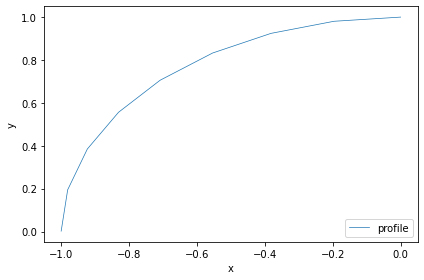

In [81]:
x = XC(theta[0])
y = YC(theta[0])
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "profile")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

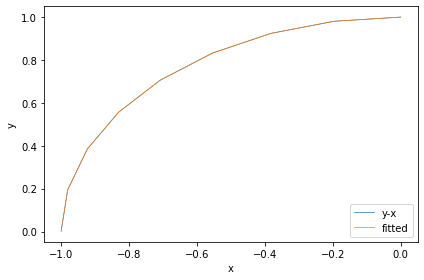

In [82]:
# cosine wave fitted to the damping wave profile
from scipy.optimize import leastsq
#parameters [guess_amp, guess_freq, guess_phase, guess_mean]
optimize_func = lambda par: np.power(x,2) + np.power(y,2) - np.power(par[0],2)
par0 = [np.max(y)]

est_radius = leastsq(optimize_func, par0)[0]

# recreate the fitted curve using the optimized parameters
xfit = est_radius*np.cos(theta[0])
yfit = est_radius*np.sin(theta[0])

fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "y-x")
ax1.plot(xfit, yfit, linewidth = 0.7, label = "fitted")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

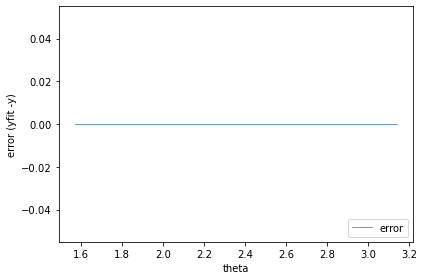

In [83]:
#error
def error (xf,yf):
    e = np.sqrt( np.power(xf,2) + np.power(yf,2)) - np.sqrt( np.power(xfit,2) + np.power(yfit,2))
    return e;

def error_kappa (k):
    e = k - (1/Radius)*np.ones(np.shape(k))
    return e;

fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("error (yfit -y)")
er = error(x,y)

ax1.plot(theta[0], er, linewidth = 0.7, label = "error")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

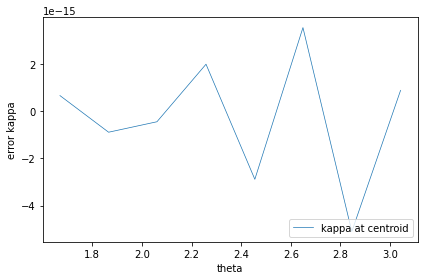

In [84]:
#Kappa at centroid

xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
thetac, kappavc = kappa_centroid_vector(xb,yb)

fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("error kappa")
ax1.plot(thetac, error_kappa(kappavc), linewidth = 0.7, label = "kappa at centroid")

xb,yb = boundary(xfit,yfit)
kappav_fit = kappa_vector(xb,yb)

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

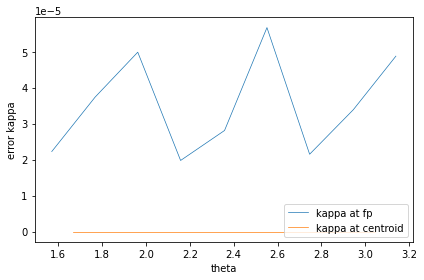

In [85]:

xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
thetac, kappavc = kappa_centroid_vector(xb,yb)

fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("error kappa")
ax1.plot(theta[0], error_kappa(kappav), linewidth = 0.7, label = "kappa at fp")
ax1.plot(thetac, error_kappa(kappavc), linewidth = 0.7, label = "kappa at centroid")

xb,yb = boundary(xfit,yfit)
kappav_fit = kappa_vector(xb,yb)

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

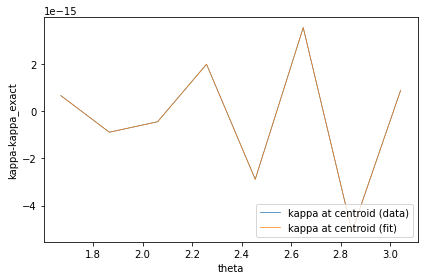

In [86]:
#centroid kappa
fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("kappa-kappa_exact")
xb,yb = boundary(xfit,yfit)
thetac, kappavc = kappa_centroid_vector(xb,yb)
ax1.plot(thetac, error_kappa(kappavc), linewidth = 0.7, label = "kappa at centroid (data)")
xb,yb = boundary(x,y)
thetac, kappavc = kappa_centroid_vector(xb,yb)
ax1.plot(thetac, error_kappa(kappavc), linewidth = 0.7, label = "kappa at centroid (fit)")

xb,yb = boundary(xfit,yfit)
kappav_fit = kappa_vector(xb,yb)

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

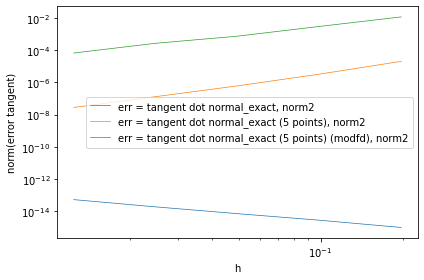

In [95]:
#tangent accuracy with grid spacing (3 point tangent)
def error_tangent(th):
    x = XC(th)
    y = YC(th)
    xb,yb = boundary(x,y)
    l, = np.shape(xb);
    l = l - 10;
    err = []
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        tc = tangent(b,c,d)
        err.append(np.dot(c,tc))
    return err;
#tangent accuracy with grid spacing (5 point tangent)
def error_tangent5(th):
    x = XC(th)
    y = YC(th)
    xb,yb = boundary(x,y)
    l, = np.shape(xb);
    l = l - 10;
    err = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tc = tangent5(a,b,c,d,e)
        err.append(np.dot(c,tc))
    return err;

def tangent5_(a, b, c, d, e):
    s0 = np.arctan2(a[1], a[0])
    s1 = np.arctan2(b[1], b[0])-s0
    s2 = np.arctan2(c[1], c[0])-s0
    s3 = np.arctan2(d[1], d[0])-s0
    s4 = np.arctan2(e[1], e[0])-s0
    u = s2;
    #define tangent_p5(x0, x1, x2, x3, x4, s1, s2, s3, s4, u)\
    c0 = ((u-s2)*(u-s3)*(u-s4) + (u-s1)*(u-s3)*(u-s4) + (u-s1)*(u-s2)*(u-s4) + (u-s1)*(u-s2)*(u-s3))/s1/s2/s3/s4;
    c1 = ((u-s2)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s3))/s1/(s1-s2)/(s1-s3)/(s1-s4);
    c2 = ((u-s1)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s3))/s2/(s2-s1)/(s2-s3)/(s2-s4);
    c3 = ((u-s1)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s2))/s3/(s3-s1)/(s3-s2)/(s3-s4);
    c4 = ((u-s1)*(u-s2)*(u-s3) + (u)*(u-s2)*(u-s3) + (u)*(u-s1)*(u-s3) + (u)*(u-s1)*(u-s2))/s4/(s4-s1)/(s4-s2)/(s4-s3);
    t = a*c0 + b*c1 + c*c2 + d*c3 + e*c4;
    l = norm(t);
    return (t/l)
def error_tangent5_(th):
    x = XC(th)
    y = YC(th)
    xb,yb = boundary(x,y)
    l, = np.shape(xb);
    l = l - 10;
    err = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tc = tangent5_(a,b,c,d,e)
        err.append(np.dot(c,tc))
    return err;
    
h = [];err2 = []; errinf = []
err2_ = []; errinf_ = []
err2__ = []; errinf__ = []
for j in range(5):
    th = theta[j]
    x = XC(th); y = YC(th);
    xb,yb = boundary(x,y)
    err = np.asarray(error_tangent(th))
    err2.append(norm(err))
    errinf.append(max(abs(err)))
    err = np.asarray(error_tangent5(th))
    err2_.append(norm(err))
    errinf_.append(max(abs(err)))
    err = np.asarray(error_tangent5_(th))
    err2__.append(norm(err))
    errinf__.append(max(abs(err)))
    h.append(Radius*np.fabs(th[1]-th[0]))
    
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error tangent)")
ax1.loglog(h,err2, linewidth = 0.7, label = "err = tangent dot normal_exact, norm2")
# ax1.loglog(h,errinf, linewidth = 0.7, label = "err = tangent dot normal_exact, norminf")
ax1.loglog(h,err2_, linewidth = 0.7, label = "err = tangent dot normal_exact (5 points), norm2")
ax1.loglog(h,err2__, linewidth = 0.7, label = "err = tangent dot normal_exact (5 points) (modfd), norm2")


ax1.legend(loc = "center right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    


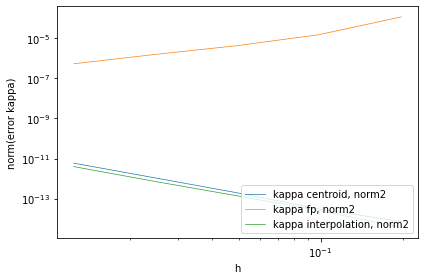

In [88]:
h = [];err2_centroid = []; errinf_centroid = []
err2_fp = []; errinf_fp = []
err2_interp = []; errinf_interp = []
for j in range(5):
    th = theta[j]
    x = XC(th); y = YC(th);
    xb,yb = boundary(x,y)
    thetac, kappavc = kappa_centroid_vector(xb,yb)
    err2_centroid.append(norm(error_kappa(kappavc)))
    errinf_centroid.append(max(abs(error_kappa(kappavc))))
    kappav = kappa_vector(xb,yb)
    err2_fp.append(norm(error_kappa(kappav)))
    errinf_fp.append(max(abs(error_kappa(kappav))))
    kappa_4 = kappa_interpolation_vector(xb,yb)
    err2_interp.append(norm(error_kappa(kappa_4)))
    errinf_interp.append(max(abs(error_kappa(kappa_4))))
    h.append(Radius*np.fabs(th[1]-th[0]))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error kappa)")
ax1.loglog(h,err2_centroid, linewidth = 0.7, label = "kappa centroid, norm2")
# ax1.loglog(h,errinf_centroid, linewidth = 0.7, label = "kappa centroid, norminf")
ax1.loglog(h,err2_fp, linewidth = 0.7, label = "kappa fp, norm2")
# ax1.loglog(h,errinf_fp, linewidth = 0.7, label = "kappa fp, norminf")
ax1.loglog(h,err2_interp, linewidth = 0.7, label = "kappa interpolation, norm2")
# ax1.loglog(h,errinf_interp, linewidth = 0.7, label = "kappa interpolation, norminf")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    

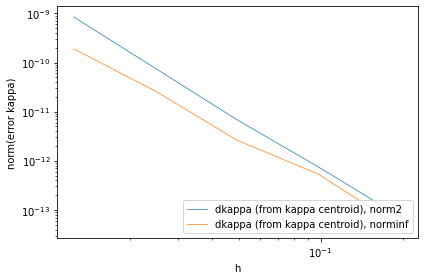

In [98]:
#derivatives (Order of accuracy)
h = [];err2_centroid = []; errinf_centroid = []
err2_fp = []; errinf_fp = []
err2_interp = []; errinf_interp = []
for j in range(5):
    th = theta[j]
    x = XC(th); y = YC(th);
    xb,yb = boundary(x,y)
    dkappav = np.asarray(dk_ds_vector(xb,yb))
    err2_centroid.append(norm(dkappav))
    errinf_centroid.append(max(abs(dkappav)))
    h.append(Radius*np.fabs(th[1]-th[0]))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error kappa)")
ax1.loglog(h,err2_centroid, linewidth = 0.7, label = "dkappa (from kappa centroid), norm2")
ax1.loglog(h,errinf_centroid, linewidth = 0.7, label = "dkappa (from kappa centroid), norminf")
# ax1.loglog(h,err2_fp, linewidth = 0.7, label = "kappa fp, norm2")
# ax1.loglog(h,errinf_fp, linewidth = 0.7, label = "kappa fp, norminf")
# ax1.loglog(h,err2_interp, linewidth = 0.7, label = "kappa interpolation, norm2")
# ax1.loglog(h,errinf_interp, linewidth = 0.7, label = "kappa interpolation, norminf")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    

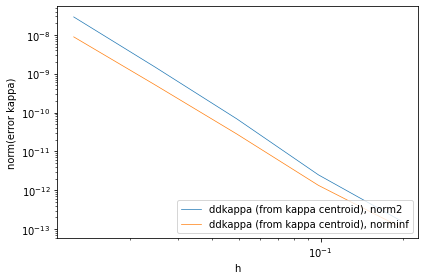

In [100]:
#derivatives (Order of accuracy)
h = [];err2_centroid = []; errinf_centroid = []
err2_fp = []; errinf_fp = []
err2_interp = []; errinf_interp = []
for j in range(5):
    th = theta[j]
    x = XC(th); y = YC(th);
    xb,yb = boundary(x,y)
    ddkappav = np.asarray(ddk_dsds_vector(xb,yb))
    err2_centroid.append(norm(ddkappav))
    errinf_centroid.append(max(abs(ddkappav)))
    h.append(Radius*np.fabs(th[1]-th[0]))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error kappa)")
ax1.loglog(h,err2_centroid, linewidth = 0.7, label = "ddkappa (from kappa centroid), norm2")
ax1.loglog(h,errinf_centroid, linewidth = 0.7, label = "ddkappa (from kappa centroid), norminf")
# ax1.loglog(h,err2_fp, linewidth = 0.7, label = "kappa fp, norm2")
# ax1.loglog(h,errinf_fp, linewidth = 0.7, label = "kappa fp, norminf")
# ax1.loglog(h,err2_interp, linewidth = 0.7, label = "kappa interpolation, norm2")
# ax1.loglog(h,errinf_interp, linewidth = 0.7, label = "kappa interpolation, norminf")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    

C:\Users\kotti\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: x and y must have same first dimension, but have shapes (5,) and (9,)

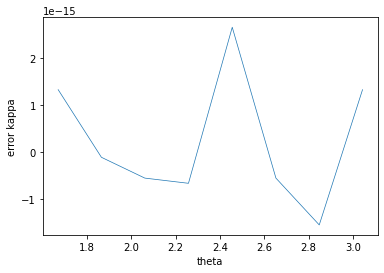

In [45]:
xb,yb = boundary(x,y)
thetac, kappavc = kappa_centroid_vector(xb,yb)
kappa_4 = kappa_interpolation_vector(xb,yb)


fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("error kappa")
#ax1.plot(theta, kappav, linewidth = 0.7, label = "kappa")
ax1.plot(thetac, error_kappa(kappavc), linewidth = 0.7, label = "kappa centroid")
ax1.plot(theta, error_kappa(kappa_4), linewidth = 0.7, label = "kappa")


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

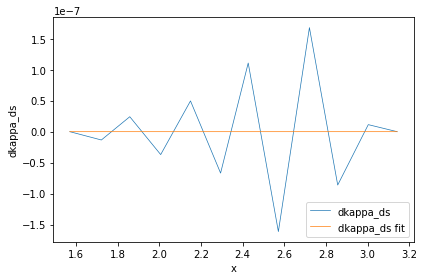

In [21]:
xb,yb = boundary(x,y)
dkappav = dk_ds_vector(xb,yb)
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("dkappa_ds")
ax1.plot(theta, dkappav, linewidth = 0.7, label = "dkappa_ds")

xb,yb = boundary(xfit,yfit)
dkappav_fit = dk_ds_vector(xb,yb)
ax1.plot(theta, dkappav_fit, linewidth = 0.7, label = "dkappa_ds fit")


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

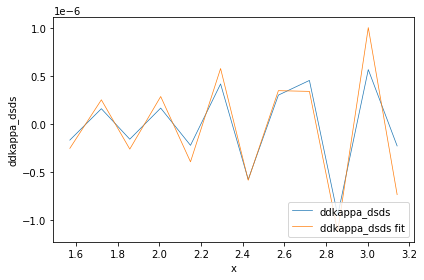

In [22]:
xb,yb = boundary(x,y)
ddkappav = ddk_dsds_vector(xb,yb)
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("ddkappa_dsds")
ax1.plot(theta, ddkappav, linewidth = 0.7, label = "ddkappa_dsds")

xb,yb = boundary(x,yfit)
ddkappav_fit = ddk_dsds_vector(xb,yb)
ax1.plot(theta, ddkappav_fit, linewidth = 0.7, label = "ddkappa_dsds fit")


#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [23]:
# def move_point(z,a,b,c,d,e,f):
#     v = -ddk_dsds7(z,a,b,c,d,e,f)*normal(tangent(b,c,d));
#     #v = -0.25*ddk_dsds5(a,b,c,d,e)*normal(tangent(b,c,d));
#     #v = -0.25*ddk_dsds(a,b,c,d,e)*normal(tangent(b,c,d));
#     return v;

# def smooth(xf, yf, N):
#     l, = np.shape(xf)
#     Delta_s = 0.5*np.pi*est_radius/(l-1);
#     C0 = 0.12*Delta_s**4
#     for ii in range(N):
#         xb, yb = boundary(xf,yf)
#         #xtemp = xf#
#         #ytemp = yf
#         for i_ in range(l):
#             i = i_ + 5;
#             z = np.array([xb[i-3],yb[i-3]]);
#             a = np.array([xb[i-2],yb[i-2]]);
#             b = np.array([xb[i-1],yb[i-1]]);
#             c = np.array([xb[i],yb[i]]);
#             d = np.array([xb[i+1],yb[i+1]]);
#             e = np.array([xb[i+2],yb[i+2]]);
#             f = np.array([xb[i+3],yb[i+3]]);
#             v = move_point(z,a,b,c,d,e,f)
#             xf[i_] += C0*v[0]
#             yf[i_] += C0*v[1] #ytemp[i_] += C0*v[1]
#         #xf = xtemp
#         #yf = ytemp
#     return


In [24]:
def smooth(xf, yf, N):
    l, = np.shape(xf)
    Delta_s = 0.5*np.pi*est_radius/(l-1);
    C0 = 0.12*Delta_s**4
    for ii in range(N):
        xb, yb = boundary(xf,yf)
        ddk = ddk_dsds_vector(xb,yb)
        xtemp = xf#
        ytemp = yf
        for i_ in range(l):
            i = i_ + 5;
            b = np.array([xb[i-1],yb[i-1]]);
            c = np.array([xb[i],yb[i]]);
            d = np.array([xb[i+1],yb[i+1]]);
            v = -normal(tangent(b,c,d))*C0*ddk[i_]
            xtemp[i_] += v[0]
            ytemp[i_] += v[1]
        xf = xtemp
        yf = ytemp
    return


In [25]:
# def smooth(xf, yf, N):
#     l, = np.shape(xf)
#     Delta_s = 0.5*np.pi*est_radius/(l-1);
#     C0 = 0.12*Delta_s**2
#     for ii in range(N):
#         xb, yb = boundary(xf,yf)
#         ki = kappa_interpolation_vector(xb,yb)
#         k  = kappa_vector(xb,yb)
#         xtemp = xf#
#         ytemp = yf
#         for i_ in range(l):
#             i = i_ + 5;
#             b = np.array([xb[i-1],yb[i-1]]);
#             c = np.array([xb[i],yb[i]]);
#             d = np.array([xb[i+1],yb[i+1]]);
#             v = -normal(tangent(b,c,d))*C0*(ki[i_]-k[i_])
#             xtemp[i_] += v[0]
#             ytemp[i_] += v[1]
#         xf = xtemp
#         yf = ytemp
#     return


In [26]:
ys = np.copy(y)
xs = np.copy(x)
smooth(xs,ys,100)

ys1 = np.copy(ys)
xs1 = np.copy(xs)
smooth(xs1,ys1,100)

ys2 = np.copy(ys1)
xs2 = np.copy(xs1)
smooth(xs2,ys2,100)

ys3 = np.copy(ys2)
xs3 = np.copy(xs2)
smooth(xs3,ys3,100)

ys4 = np.copy(ys3)
xs4 = np.copy(xs3)
smooth(xs4,ys4,100)

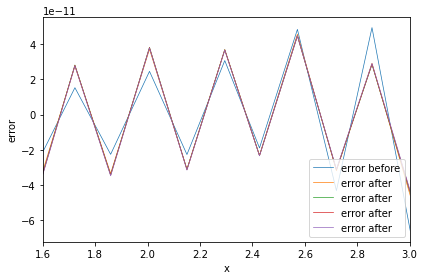

In [27]:

#error after smoothing. w.r.t to cosine fit
fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("error")
ax1.plot(theta, error(x,y), linewidth = 0.7, label = "error before")
ax1.plot(theta, error(xs,ys), linewidth = 0.7, label = "error after")
ax1.plot(theta, error(xs1,ys1), linewidth = 0.7, label = "error after")
ax1.plot(theta, error(xs2,ys2), linewidth = 0.7, label = "error after")

ax1.plot(theta, error(xs4,ys4), linewidth = 0.7, label = "error after")
ax1.legend(loc = "lower right")
ax1.set_xlim(left=1.6, right=3.);
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

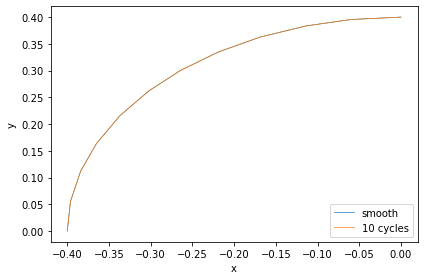

In [28]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "smooth")
ax1.plot(xs, ys, linewidth = 0.7, label = "10 cycles")


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [29]:
xb,yb = boundary(x,y)
kappav = kappa_interpolation_vector(xb,yb)
thetac,kappavc = kappa_centroid_vector(xb,yb)
dkappav = dk_ds_vector(xb,yb)
ddkappav = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xfit,yfit)
kappavfit = kappa_interpolation_vector(xb,yb)
#xc,kappavfit = kappa_centroid_vector(xb,yb)
dkappavfit = dk_ds_vector(xb,yb)
ddkappavfit = ddk_dsds_vector(xb,yb)


xb,yb = boundary(xs,ys)
kappasv = kappa_interpolation_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappasv = dk_ds_vector(xb,yb)
ddkappasv = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs1,ys1)
kappas1v = kappa_interpolation_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas1v = dk_ds_vector(xb,yb)
ddkappas1v = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs2,ys2)
kappas2v = kappa_interpolation_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas2v = dk_ds_vector(xb,yb)
ddkappas2v = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs3,ys3)
kappas3v =  kappa_interpolation_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas3v = dk_ds_vector(xb,yb)
ddkappas3v = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs4,ys4)
kappas4v =  kappa_interpolation_vector(xb,yb)
thetac,kappas4vc = kappa_centroid_vector(xb,yb)
dkappas4v = dk_ds_vector(xb,yb)
ddkappas4v = ddk_dsds_vector(xb,yb)


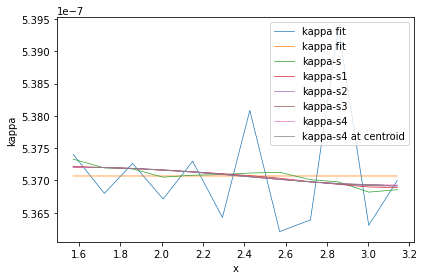

In [30]:
fig, ax1 = plt.subplots()

kexact = 2.5*np.ones(np.shape(theta))
ax1.set_xlabel("x")
ax1.set_ylabel("kappa")
ax1.plot(theta, kappav-kexact, linewidth = 0.7, label = "kappa fit")
#ax1.plot(thetac, kappavc-2.5*np.ones(np.shape(thetac)), linewidth = 0.7, label = "kappa (data) at centroid")
ax1.plot(theta, kappavfit-kexact, linewidth = 0.7, label = "kappa fit")
ax1.plot(theta, kappasv-kexact, linewidth = 0.7, label = "kappa-s")
ax1.plot(theta, kappas1v-kexact, linewidth = 0.7, label = "kappa-s1")
ax1.plot(theta, kappas2v-kexact, linewidth = 0.7, label = "kappa-s2")
ax1.plot(theta, kappas3v-kexact, linewidth = 0.7, label = "kappa-s3")
ax1.plot(theta, kappas4v-kexact, linewidth = 0.7, label = "kappa-s4")
ax1.plot(thetac, kappas4vc-2.5*np.ones(np.shape(thetac)), linewidth = 0.7, label = "kappa-s4 at centroid")




#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

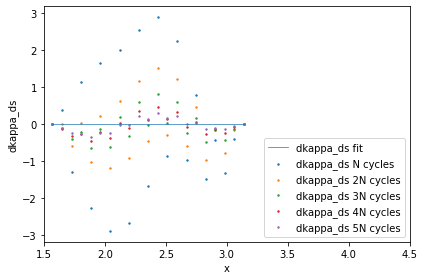

In [558]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("dkappa_ds")
#ax1.plot(x, dkappav, linewidth = 0.7, label = "dkappa_ds")
#ax1.plot(theta, dkappav, linewidth = 0.7, label = "dkappa_ds")
ax1.plot(theta, dkappavfit, linewidth = 0.7, label = "dkappa_ds fit")
ax1.scatter(theta, dkappasv, s=2., label = "dkappa_ds N cycles")
ax1.scatter(theta, dkappas1v, s=2., label = "dkappa_ds 2N cycles")
ax1.scatter(theta, dkappas2v, s=2., label = "dkappa_ds 3N cycles")
ax1.scatter(theta, dkappas3v, s=2., label = "dkappa_ds 4N cycles")
ax1.scatter(theta, dkappas4v, s=2., label = "dkappa_ds 5N cycles")



ax1.set_xlim(left=1.5, right=4.5);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

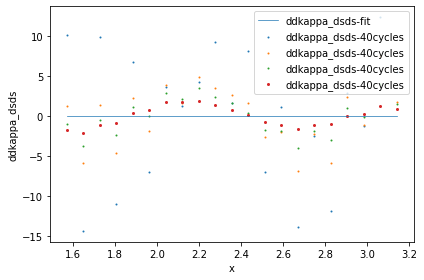

In [559]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("ddkappa_dsds")
#ax1.plot(theta, ddkappav, linewidth = 0.7, label = "ddkappa_dsds")
ax1.plot(theta, ddkappavfit, linewidth = 0.7, label = "ddkappa_dsds-fit")
ax1.scatter(theta, ddkappasv, s = 1., label = "ddkappa_dsds-40cycles")
ax1.scatter(theta, ddkappas1v, s = 1., label = "ddkappa_dsds-40cycles")
ax1.scatter(theta, ddkappas2v, s = 1., label = "ddkappa_dsds-40cycles")
ax1.scatter(theta, ddkappas4v, s = 4., label = "ddkappa_dsds-40cycles")

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


In [560]:
#How much does the points move in first itern
l, = np.shape(x)
Delta_s = 0.5*np.pi*est_radius/(l-1);
C0 = 0.12*Delta_s**4
C0*ddkappasv
# 0.12*Delta_s**2
# Delta_s**2

array([ 1.18910063e-06, -1.68151985e-06,  1.15335662e-06, -1.29234105e-06,
        7.87966084e-07, -8.11557913e-07,  4.28237923e-07,  1.47481066e-07,
        5.01703972e-07,  1.07854972e-06,  1.89841551e-07,  9.49355911e-07,
       -8.17633493e-07,  1.29015461e-07, -1.62033249e-06, -2.96402807e-07,
       -1.38895744e-06,  3.35218556e-07, -1.49801591e-07,  1.44442428e-06,
        6.45945099e-07])

In [561]:
#meanwhile error
error(x,y)


array([-1.39973262e-04,  1.95901742e-03, -1.41013052e-03,  4.92343525e-07,
        4.48017759e-05,  1.11375619e-03, -6.56119874e-04, -6.21957277e-05,
       -8.64319849e-04, -3.13695246e-04,  3.93220188e-04, -1.16994889e-03,
        3.64773296e-04,  1.31172311e-03, -5.57225115e-04,  2.50890650e-04,
       -1.17494895e-04,  9.37726174e-04,  4.54317358e-04, -6.31920562e-05,
       -1.49575485e-03])

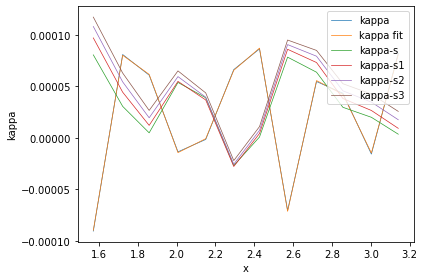

In [504]:
xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
#xc,kappav = kappa_centroid_vector(xb,yb)
dkappav = dk_ds_vector(xb,yb)
ddkappav = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xfit,yfit)
kappavfit = kappa_vector(xb,yb)
#xc,kappavfit = kappa_centroid_vector(xb,yb)
dkappavfit = dk_ds_vector(xb,yb)
ddkappavfit = ddk_dsds_vector(xb,yb)


xb,yb = boundary(xs,ys)
kappasv = kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappasv = dk_ds_vector(xb,yb)
ddkappasv = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs1,ys1)
kappas1v = kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas1v = dk_ds_vector(xb,yb)
ddkappas1v = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs2,ys2)
kappas2v = kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas2v = dk_ds_vector(xb,yb)
ddkappas2v = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs3,ys3)
kappas3v =  kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas3v = dk_ds_vector(xb,yb)
ddkappas3v = ddk_dsds_vector(xb,yb)

xb,yb = boundary(xs4,ys4)
kappas4v =  kappa_vector(xb,yb)
#xc,kappasv = kappa_centroid_vector(xb,yb)
dkappas4v = dk_ds_vector(xb,yb)
ddkappas4v = ddk_dsds_vector(xb,yb)

fig, ax1 = plt.subplots()

kexact = 2.5*np.ones(np.shape(theta))
ax1.set_xlabel("x")
ax1.set_ylabel("kappa")
ax1.plot(theta, kappav-kexact, linewidth = 0.7, label = "kappa")
ax1.plot(theta, kappavfit-kexact, linewidth = 0.7, label = "kappa fit")
ax1.plot(theta, kappasv-kexact, linewidth = 0.7, label = "kappa-s")
ax1.plot(theta, kappas1v-kexact, linewidth = 0.7, label = "kappa-s1")
ax1.plot(theta, kappas2v-kexact, linewidth = 0.7, label = "kappa-s2")
ax1.plot(theta, kappas3v-kexact, linewidth = 0.7, label = "kappa-s3")




#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()